In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
data = pd.read_csv('/content/drive/MyDrive/DataSet/iris/iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [112]:
#Các nhãn
labels = data.loc[:,'class'].unique()
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [113]:
#Lượn phân bố nhãn
data['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [114]:
#split data
X = data
y = data.pop('class')
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 42)

In [115]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (120, 4)
X_test:  (30, 4)
y_train:  (120,)
y_test:  (30,)


# KNN

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
k_values = [i for i in range (1,31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(np.mean(score))

In [118]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
y_pred = knn.predict(X_test)

In [120]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of KNN:", accuracy)


Accuracy of KNN: 1.0


In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<Axes: >

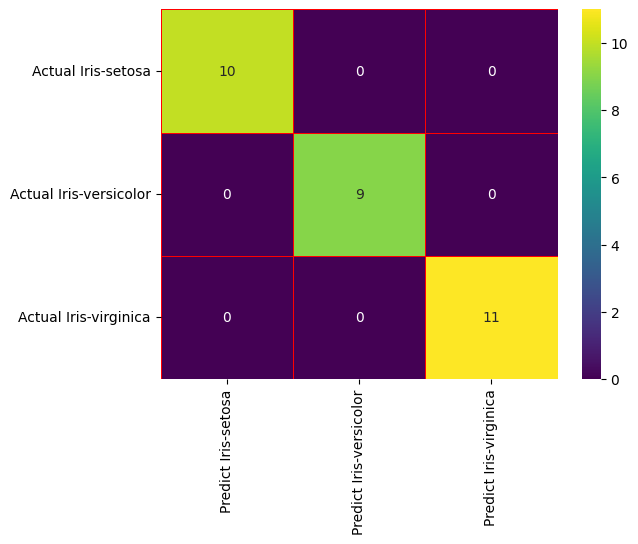

In [122]:
from sklearn.utils.multiclass import unique_labels

def plot(y_test, y_pred):
  labels = unique_labels(y_test)
  columns = [f'Predict {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       columns=columns, index=index)
  return sns.heatmap(table,annot = True, cmap='viridis', linewidths= 0.5, linecolor="red", fmt=".0f")
plot(y_test, y_pred)


# SVM

In [123]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [124]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of SVM:", accuracy)

Accuracy of SVM: 1.0


In [125]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<Axes: >

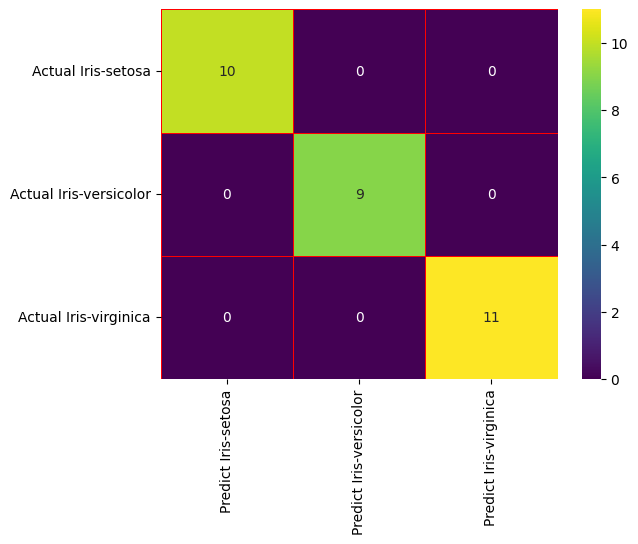

In [126]:
from sklearn.utils.multiclass import unique_labels

def plot(y_test, y_pred):
  labels = unique_labels(y_test)
  columns = [f'Predict {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       columns=columns, index=index)
  return sns.heatmap(table,annot = True, cmap='viridis', linewidths= 0.5, linecolor="red", fmt=".0f")
plot(y_test, y_pred)


# Linear Discriminant Analysis (LDA)

In [127]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [128]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of LDA:", accuracy)

Accuracy of LDA: 1.0


In [129]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<Axes: >

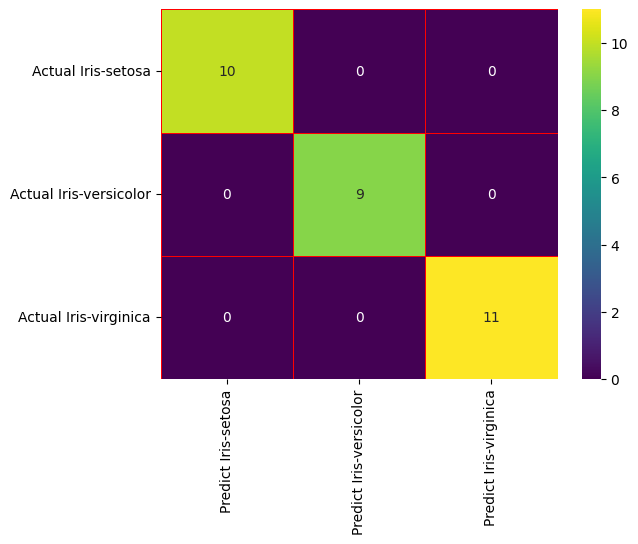

In [130]:
from sklearn.utils.multiclass import unique_labels

def plot(y_test, y_pred):
  labels = unique_labels(y_test)
  columns = [f'Predict {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       columns=columns, index=index)
  return sns.heatmap(table,annot = True, cmap='viridis', linewidths= 0.5, linecolor="red", fmt=".0f")
plot(y_test, y_pred)


# Random Forest (RF)

In [131]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [132]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest:", accuracy)

Accuracy of Random Forest: 1.0


In [133]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

<Axes: >

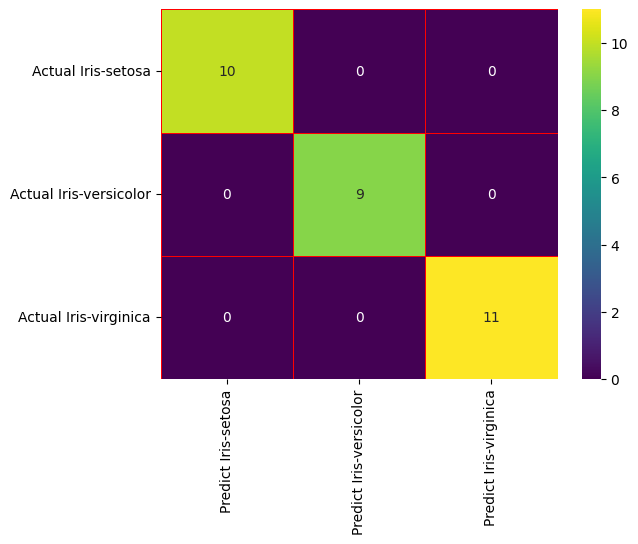

In [134]:
from sklearn.utils.multiclass import unique_labels

def plot(y_test, y_pred):
  labels = unique_labels(y_test)
  columns = [f'Predict {label}' for label in labels]
  index = [f'Actual {label}' for label in labels]
  table = pd.DataFrame(confusion_matrix(y_test, y_pred),
                       columns=columns, index=index)
  return sns.heatmap(table,annot = True, cmap='viridis', linewidths= 0.5, linecolor="red", fmt=".0f")
plot(y_test, y_pred)
